<a href="https://colab.research.google.com/github/yxrellx/practicaredNeuronal/blob/main/Reconocimiento_de_imagenes_Red_Neuronal_Convolucional_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Superheroes2'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'batman' in filename:
      y.append(0) #indice 0 batman
    elif 'ironman' in filename: #indice 1 ironman
      y.append(1)
    elif 'linternaverde' in filename: #indice 2 linternaverde
      y.append(2)
    elif 'spiderman' in filename: #indice 3 spiderman
      y.append(3)
    elif 'wolwerine' in filename: #indice 4 wolwerine
      y.append(4)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas

In [30]:
type(image_list)

list

In [31]:
type(image_list[0])

numpy.ndarray

In [32]:
image_list[0]

array([[[0.49019608, 0.52156863, 0.52941176],
        [0.49803922, 0.50980392, 0.51764706],
        [0.48235294, 0.49411765, 0.49411765],
        ...,
        [0.92156863, 0.84705882, 0.08627451],
        [0.91764706, 0.83921569, 0.08627451],
        [0.89803922, 0.79607843, 0.09019608]],

       [[0.54509804, 0.58039216, 0.59215686],
        [0.54117647, 0.57647059, 0.58431373],
        [0.5372549 , 0.55686275, 0.56862745],
        ...,
        [0.9254902 , 0.84313725, 0.09411765],
        [0.90588235, 0.81960784, 0.10196078],
        [0.8745098 , 0.76470588, 0.10980392]],

       [[0.6       , 0.62352941, 0.65098039],
        [0.58431373, 0.62352941, 0.63921569],
        [0.56078431, 0.60784314, 0.61176471],
        ...,
        [0.93333333, 0.84705882, 0.08627451],
        [0.90980392, 0.81176471, 0.09411765],
        [0.84313725, 0.74901961, 0.09411765]],

       ...,

       [[0.00784314, 0.        , 0.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01960784, 0

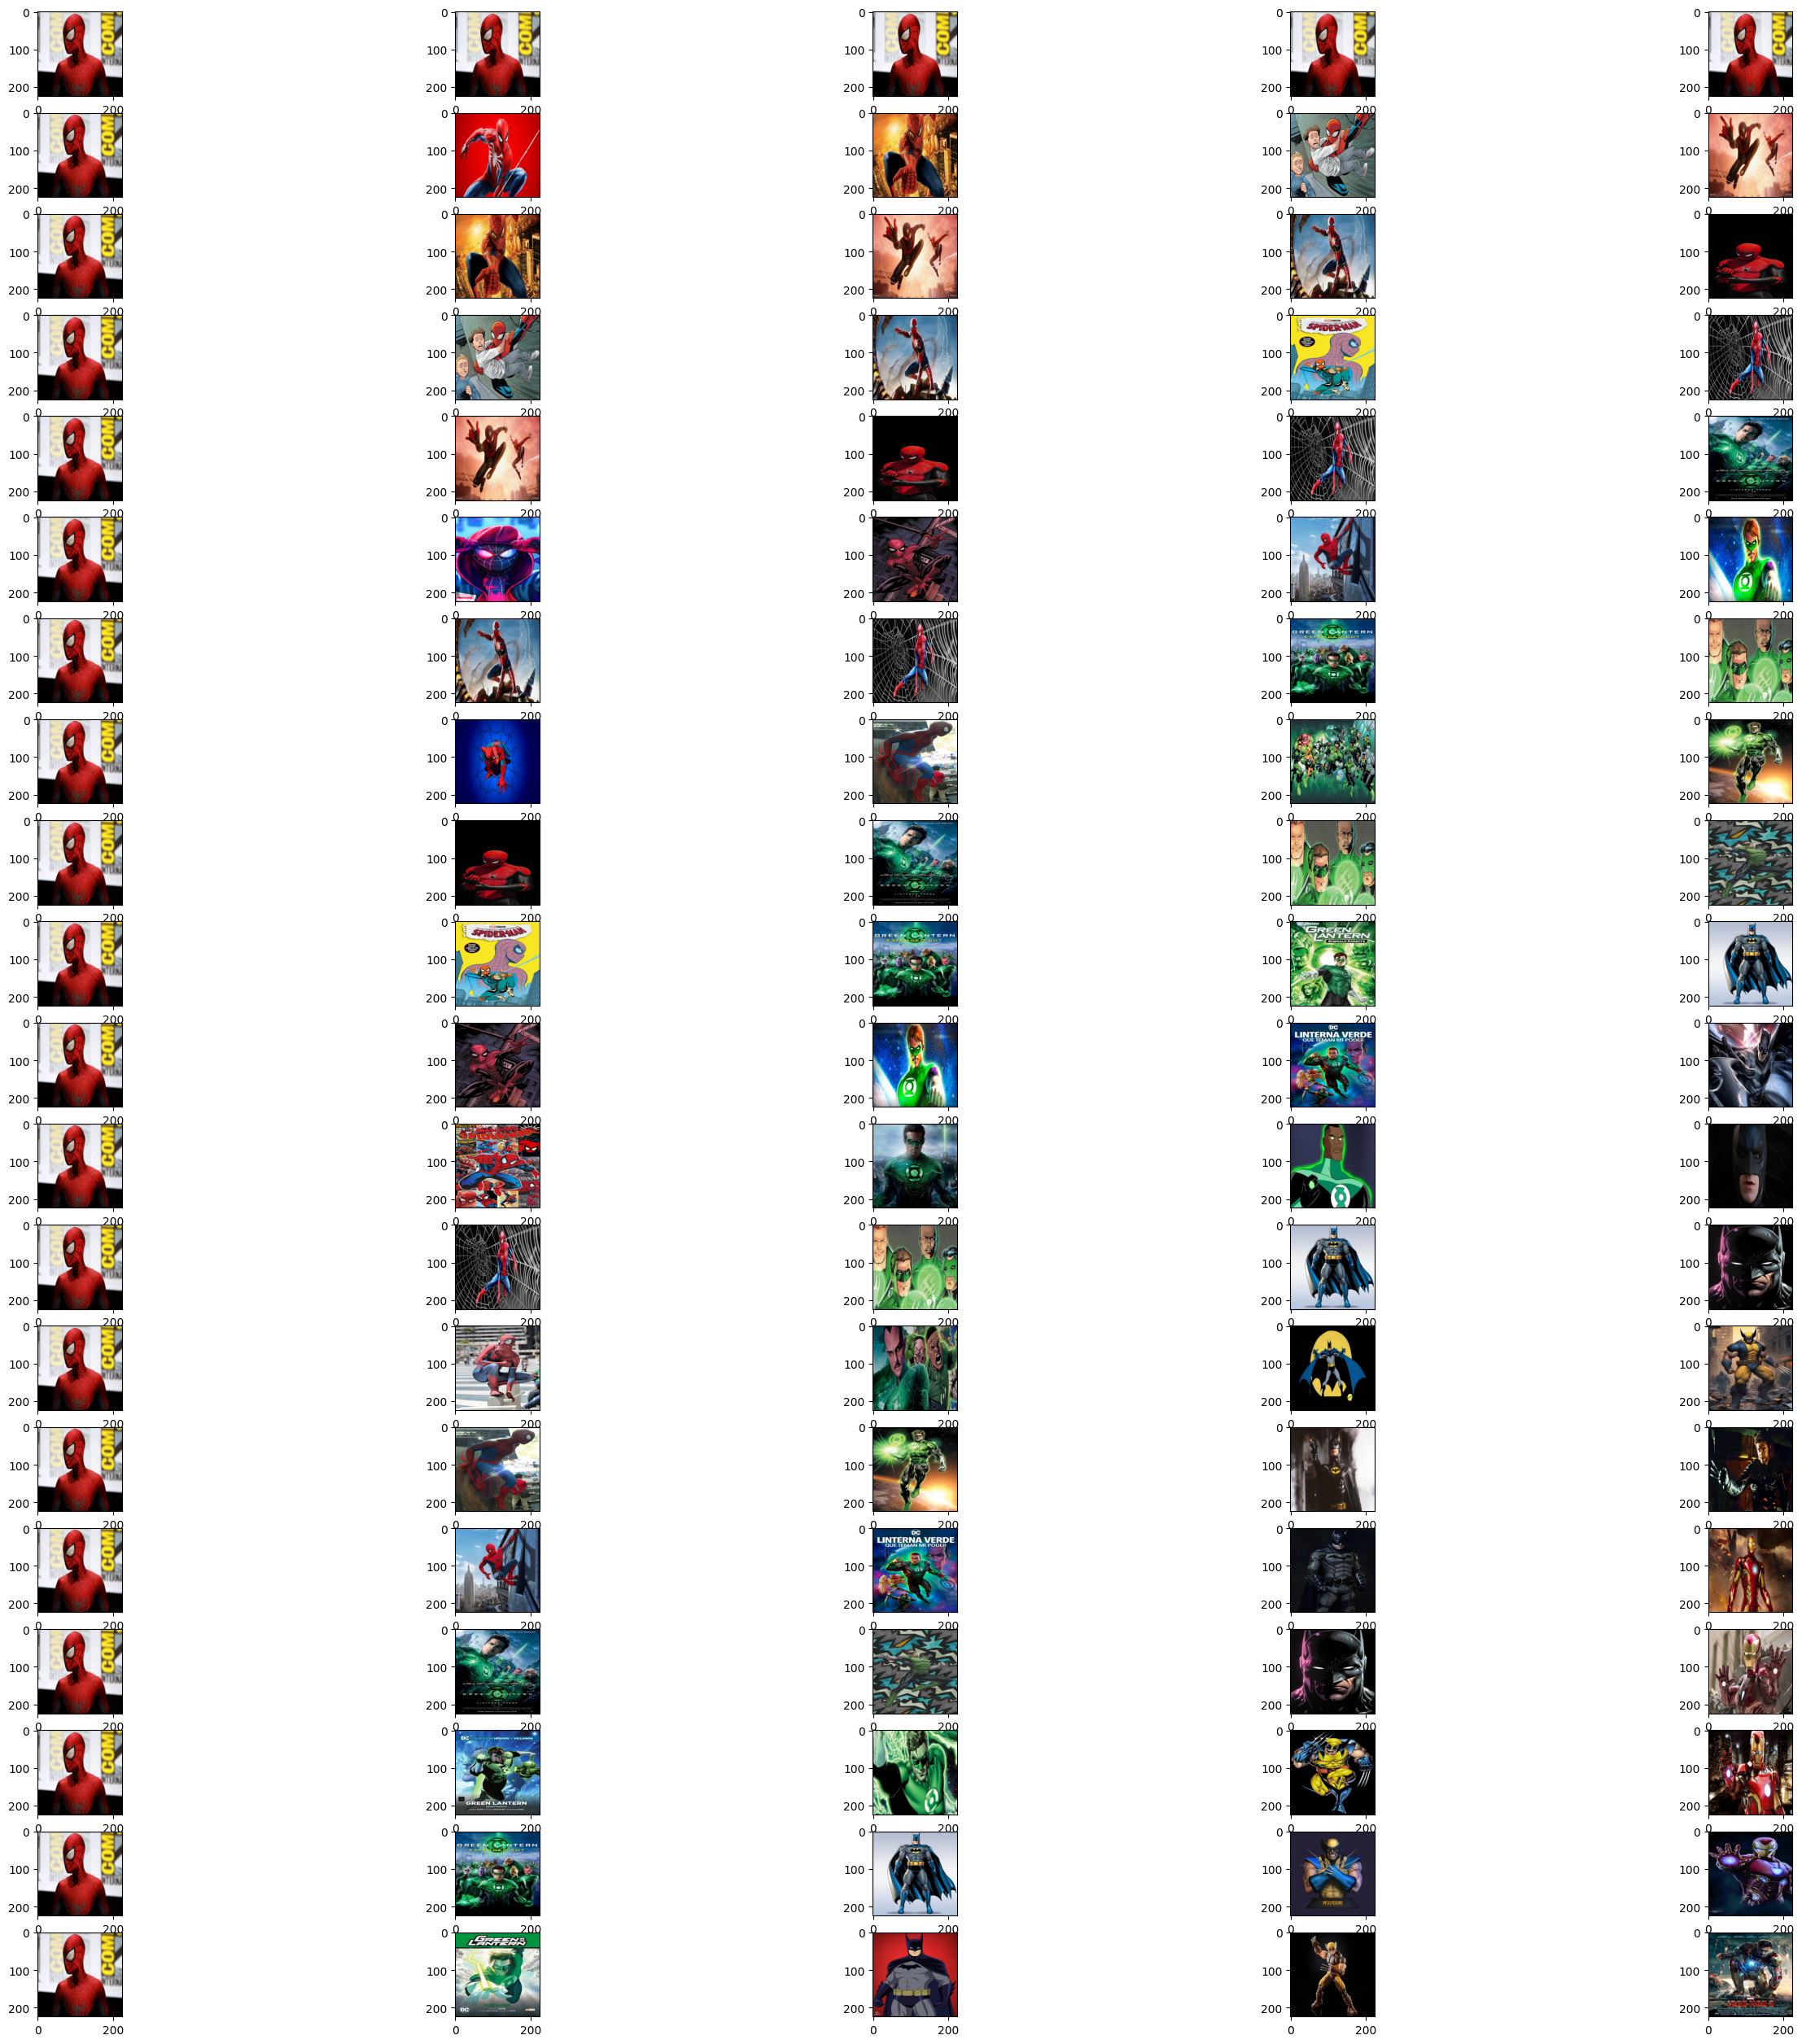

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
import matplotlib.pyplot as plt
nImagenes = len(image_list)
filas = nImagenes // 5
fig, axes = plt.subplots(filas,5, figsize=(32,32))
for f in range(filas):
  for c in range(5):
    axes[f,c].imshow(image_list[f*c])

#axes[0,0].imshow(image_list_train[0])
#for i,ax in enumerate(image_list_train):
#    ax.imshow(image_list_train[i].flat)
#imgplot = plt.imshow(img)
#plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
y_test

[2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2]

In [36]:
y_train

[4,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 0,
 0,
 2,
 4,
 3,
 0,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 3,
 0,
 1,
 1,
 4,
 1,
 0,
 3,
 0,
 2,
 4,
 4,
 3,
 3,
 2,
 1,
 4,
 2,
 0,
 0,
 3,
 2,
 4,
 3,
 1,
 1,
 2,
 2,
 4,
 2,
 1,
 1,
 3,
 2,
 4,
 2,
 0,
 4,
 4,
 0,
 1,
 2,
 0,
 2,
 4,
 2,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 2,
 0,
 1]

In [37]:
#Carga de librerias
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten
keras.utils.set_random_seed(812)
np.random.seed(812)
model = models.Sequential()
tam_kernel1 = (3,3)
model.add(layers.Conv2D(64, tam_kernel1, activation='relu', input_shape=(224, 224, 3)))
tam_pooling1 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling1))
tam_kernel2 = (3,3)
model.add(layers.Conv2D(64, tam_kernel2, activation='relu'))
tam_pooling2 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling2))
tam_kernel3 = (3,3)
#model.add(layers.Conv2D(64, tam_kernel3, activation='relu'))
#tam_pooling3 = (2,2)
#model.add(layers.MaxPooling2D(tam_pooling3))
#tam_kernel4 = (3,3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

In [39]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[4,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 0,
 0,
 2,
 4,
 3,
 0,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 3,
 0,
 1,
 1,
 4,
 1,
 0,
 3,
 0,
 2,
 4,
 4,
 3,
 3,
 2,
 1,
 4,
 2,
 0,
 0,
 3,
 2,
 4,
 3,
 1,
 1,
 2,
 2,
 4,
 2,
 1,
 1,
 3,
 2,
 4,
 2,
 0,
 4,
 4,
 0,
 1,
 2,
 0,
 2,
 4,
 2,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 2,
 0,
 1]

In [41]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [42]:
#Verificamos el cambio
y_train

array([4, 3, 2, 3, 3, 1, 3, 3, 2, 1, 0, 0, 2, 4, 3, 0, 1, 1, 4, 3, 1, 1,
       3, 3, 0, 1, 1, 4, 1, 0, 3, 0, 2, 4, 4, 3, 3, 2, 1, 4, 2, 0, 0, 3,
       2, 4, 3, 1, 1, 2, 2, 4, 2, 1, 1, 3, 2, 4, 2, 0, 4, 4, 0, 1, 2, 0,
       2, 4, 2, 4, 0, 3, 0, 0, 0, 4, 4, 2, 0, 1])

In [43]:
type(y_train)

numpy.ndarray

In [44]:
y_train.shape

(80,)

In [45]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)

In [46]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
ajuste = %time model.fit(X_train,y_train,epochs=30,batch_size=16)
ajuste

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2250 - loss: 9.3853
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2658 - loss: 2.0916
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6280 - loss: 1.1513
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7236 - loss: 0.7236
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9932 - loss: 0.2426
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9898 - loss: 0.0812
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9741 - loss: 0.0646
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9958 - loss: 0.0245
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9932 - loss: 0.0656
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9856 - loss: 0.0578
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9932 - loss: 0.0311
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0108
E

In [47]:
%time y_train

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [48]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [50]:
y_test = keras.utils.to_categorical(y_test, num_classes=5)

In [51]:
#Verificamos su forma
y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [52]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [53]:
#Revisamos el resultado
y_pred

array([[1.26308396e-05, 3.04841058e-04, 9.99100387e-01, 5.76901657e-04,
        5.08420999e-06],
       [9.76893485e-01, 4.08480468e-04, 1.88004300e-02, 1.96388015e-03,
        1.93356106e-03],
       [1.79236963e-08, 8.70911181e-01, 6.00609237e-05, 1.20953895e-01,
        8.07475857e-03],
       [9.46525470e-05, 1.68862730e-01, 3.09552415e-04, 1.88287202e-04,
        8.30544710e-01],
       [6.77032629e-03, 5.42592593e-02, 8.14350903e-01, 1.12985507e-01,
        1.16340406e-02],
       [6.99201301e-02, 4.26606536e-01, 4.69733089e-01, 2.17210744e-02,
        1.20192217e-02],
       [7.66604906e-03, 6.30784198e-04, 9.56522405e-01, 1.22224694e-04,
        3.50585580e-02],
       [2.53899110e-04, 2.48902902e-01, 4.90549505e-02, 6.85860217e-01,
        1.59279983e-02],
       [3.99532018e-06, 7.95209944e-01, 5.59464563e-03, 9.38429460e-02,
        1.05348475e-01],
       [7.44664252e-01, 5.44166192e-02, 1.09128118e-01, 9.15488452e-02,
        2.42055234e-04],
       [6.45895489e-03, 5.9187

In [54]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [55]:
type(y_pred)

numpy.ndarray

In [56]:
y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [57]:
type(y_test)

numpy.ndarray

In [58]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 1, 4, 2, 0, 2, 3, 1, 0, 3, 3, 2, 1, 2, 2, 4, 0, 1, 2])

In [59]:
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [60]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.5
Precisión por clase: [0.75       0.25       0.57142857 0.33333333 0.5       ] -> 0.4809523809523809
Sensibilidad por clase: [0.75 0.25 1.   0.25 0.25] -> 0.5
F1 Score por clase: [0.75       0.25       0.72727273 0.28571429 0.33333333] -> 0.46926406926406933


In [61]:
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

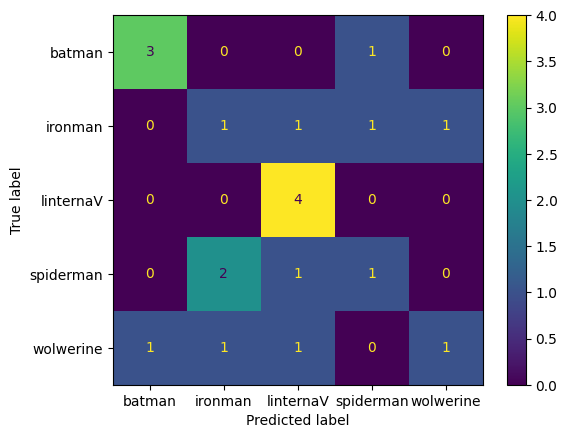

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['batman','ironman','linternaV','spiderman','wolwerine']
disp.plot()

In [64]:
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [65]:
y_pred

array([2, 0, 1, 4, 2, 0, 2, 3, 1, 0, 3, 3, 2, 1, 2, 2, 4, 0, 1, 2])

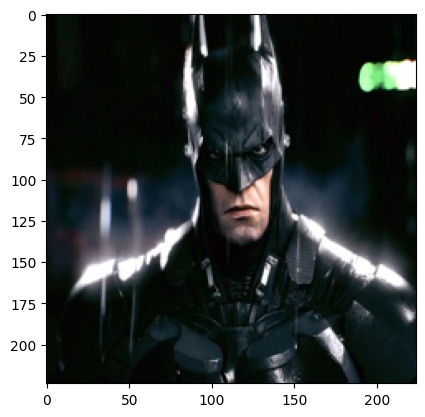

In [66]:
import matplotlib.pyplot as plt
img_array = (X_test[1] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)